In [36]:
import datetime as dt
import pandas as pd
import numpy as np
import pandas_datareader as dr
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf

yf.pdr_override()  ## for fixing pandas data reader error

In [44]:
stock_name =["TCS","SBIN"]
stock_name =[ x+".NS" for x in stock_name]

start =dt.date.today()-dt.timedelta(days=2000)

df1= dr.data.get_data_yahoo(stock_name[0],start,end =dt.date.today())
df1.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-15,1144.43,1145.85,1127.50,1130.55,1012.47,3269408
2016-01-18,1131.00,1145.95,1130.00,1138.82,1019.88,2213922
2016-01-19,1138.50,1150.00,1134.15,1139.65,1020.62,967910
2016-01-20,1136.90,1142.50,1121.50,1140.05,1020.98,1615954
2016-01-21,1142.50,1144.95,1122.88,1127.25,1011.96,2675536


In [45]:
df1.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1348 entries, 2016-01-15 to 2021-07-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1348 non-null   float64
 1   High       1348 non-null   float64
 2   Low        1348 non-null   float64
 3   Close      1348 non-null   float64
 4   Adj Close  1348 non-null   float64
 5   Volume     1348 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.7 KB


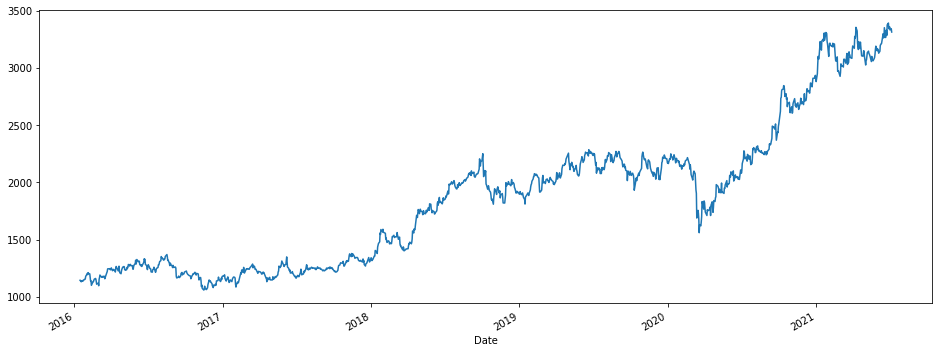

In [47]:
df1["Open"].plot(figsize=(16,6))

In [48]:
df1.shape

(1348, 6)

In [55]:
x =df1["Close"]
x=np.array(x).reshape(-1,1)

array([[1130.55],
       [1138.82],
       [1139.65],
       ...,
       [3325.45],
       [3321.  ],
       [3262.3 ]])

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
x= scaler.fit_transform(x)

1348

In [65]:
## spliting the data in train test

size = int(len(x)*.75)
train_x= x[0:size]
test_x=x[size:]

337


In [79]:
def create_dataset(data,time_step=3):
    x_data,y_data=[],[]
    
    for i in range(len(data)-time_step-1):
        a=data[i:i+time_step,0]
        x_data.append(a)
        y_data.append(data[i+time_step,0])
        
    return np.array(x_data),np.array(y_data)

In [80]:
time_step=100

x_train,y_train = create_dataset(train_x,time_step)
x_test,y_test =create_dataset(test_x,time_step)

In [84]:
print(x_train.shape)
print(y_train.shape)

(910, 100)
(910,)


In [ ]:
# reshaping input for LSTM input type [samples,time_steps,fetures]
x_train=x_train.reshape(x)